# CanESM5 GMD paper Figure 18
## zonal mean meridional heat transport in the ocean

Meridional heat transport (`hfbasin`), compared against observations and other models, incl. CanESM2.



In [ ]:
import xarray as xr
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import iris
import iris.analysis.cartography
import iris.quickplot as qplt
import iris.plot as iplt
from cdo import *

cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

In [2]:
#hfbasin=xr.open_dataset('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Omon/hfbasin/gn/v20190429/hfbasin_Omon_CanESM5_historical_r1i1p1f1_gn_199601-200512.nc')
hfbasin = xr.open_dataset('/space/hall2/sitestore/eccc/crd/CMIP6/verification/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/hfbasin/gn/v20190429/hfbasin_Omon_CanESM5_historical_r1i1p1f1_gn_199601-200512.nc')
hfbasin = hfbasin['hfbasin'].mean(dim='time')/1e15


In [3]:
# Obs estimates from Ganachaud, A., and C. Wunsch, 2003: 
#Large-scale ocean heat and freshwater transports during the World Ocean Circulation Experiment. J. Climate, 16, 696–705.

obslat = [47, 24, -19, -30]
obshf_global = [0.6, 1.8, -0.8, -0.6]
obshf_global_del = [0.1, 0.3, 0.6, 0.3]

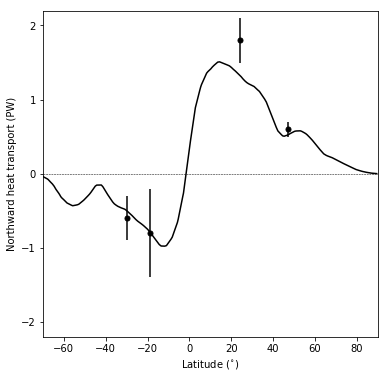

In [4]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(hfbasin.lat, hfbasin.sel(basin=2), label='Global', color='k')
ax.errorbar(obslat, obshf_global, obshf_global_del, fmt='ok', ecolor='k', ms=5, zorder=10)
ax.set_xlabel('Latitude ($^{\circ}$)')
ax.set_ylabel('Northward heat transport (PW)')
ax.set_xlim([-70,90])
ax.set_ylim([-2.2, 2.2])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.axhline(y=0, linestyle='--', linewidth=0.5, color='k')

fig.savefig('plots/fig-18_ocean_mht.png', bbox_inches='tight')
fig.savefig('plots/fig-18_ocean_mht.pdf', bbox_inches='tight')